In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
import re
import string
import math
import gensim.downloader as api

In [2]:
print("np version : {}".format(np.__version__))
print("pd version : {}".format(pd.__version__))
print("may chaos take the world.")

np version : 1.24.1
pd version : 1.5.3
may chaos take the world.


<h1>Opening data</h1>

In [3]:
dataset = pd.read_excel("Dataset.xlsx")
questionList = dataset["Question"].unique()
answerList = dataset["Answer"]
# for answer in answerList:
#     print(answer)
print("Answer list : {}".format(len(answerList)))
print("Question list : {}".format(len(questionList)))

dataset

Answer list : 72
Question list : 11


,No,Question,Answer,Event,Speaker,Q-Label,A-Label
0,1,How did we come to exist?,Everybody should believe that they are creatio...,2022-02-19,P,Sesuai,Sesuai
1,2,How did we come to exist?,"We came from evolution. This is undeniable, an...",2022-02-19,G,Sesuai,Sesuai
2,3,Do you think you need to exist?,We don't really need to exist. Even if I don't...,2022-02-19,P,Sesuai,Sesuai
3,4,Do you think you need to exist?,"I don't think we need to exist. As Peter said,...",2022-02-19,Je,Sesuai,Sesuai
4,5,Do you think you need to exist?,I think we are a part of a bigger picture.,2022-02-19,Th,Sesuai,Tidak Sesuai
...,...,...,...,...,...,...,...
67,68,We see from our side that maybe they are miser...,"Everyone has rights, even fetuses/babies, but ...",2023-07-02,Stanley,NaN,NaN
68,69,We see from our side that maybe they are miser...,Is it wrong to regret life? That is the right ...,2023-07-02,Greg,NaN,NaN
69,70,We see from our side that maybe they are miser...,"Actually, we humans are well aware that life i...",2023-07-02,Yotam,NaN,NaN
70,71,We see from our side that maybe they are miser...,The law didn't need to be revised. Choosing th...,2023-07-02,Stanley,NaN,NaN


<h1>Preprocessing</h1>

In [4]:
# Standardize speaker labels i guess. It's fine not to censor it for now
speakerNames = dataset["Speaker"].unique()
speakerNames


array(['P', 'G', 'Je', 'Th', 'DJ', 'R', 'Mi', 'Pau', 'Liz', 'A', 'Y',
       'Au', 'An', 'Sam', 'Kenny', 'Liv', 'Ksmg', 'Mar', 'E', 'Jeje',
       'Jerico', 'Yordi', 'Greg', 'Ricky', 'Martin', 'Yotam', 'Stanley'],
      dtype=object)

In [5]:
# No casefolding

# needs case folding sometimes...
for i in range(len(answerList)):
    answerList[i] = answerList[i].lower()
    
# Remove punctuations
for i in range(len(answerList)):
    answerList[i] = "".join([char for char in answerList[i] if char not in string.punctuation])

C:\Users\peter\AppData\Local\Temp\ipykernel_2176\1804671916.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answerList[i] = answerList[i].lower()
C:\Users\peter\AppData\Local\Temp\ipykernel_2176\1804671916.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answerList[i] = "".join([char for char in answerList[i] if char not in string.punctuation])


In [6]:
# tokenizing
for i in range(len(answerList)):
    answerList[i] = nltk.word_tokenize(answerList[i])
    print(answerList[i])

['everybody', 'should', 'believe', 'that', 'they', 'are', 'creations', 'made', 'by', 'a', 'creator', 'it', 'is', 'a', 'prerequisite', 'to', 'believing', 'anything', 'else', 'that', 'comes', 'after']
['we', 'came', 'from', 'evolution', 'this', 'is', 'undeniable', 'and', 'the', 'charles', 'darwins', 'evolution', 'model', 'is', 'the', 'most', 'widely', 'accepted', 'theory', 'to', 'this', 'we', 'evolved', 'from', 'unicellular', 'bacteriae', 'to', 'fish', 'to', 'amphibious', 'creatures', 'to', 'mammals', 'to', 'apes', 'then', 'all', 'the', 'way', 'to', 'humans']
['we', 'dont', 'really', 'need', 'to', 'exist', 'even', 'if', 'i', 'dont', 'exist', 'everything', 'would', 'go', 'on', 'as', 'its', 'supposed', 'to', 'be', 'my', 'existence', 'is', 'one', 'amongst', 'many', 'it', 'should', 'not', 'gravely', 'affect', 'the', 'world', 'and', 'life', 'would', 'go', 'on']
['i', 'dont', 'think', 'we', 'need', 'to', 'exist', 'as', 'peter', 'said', 'everything', 'would', 'just', 'go', 'on', 'as', 'usual', 

C:\Users\peter\AppData\Local\Temp\ipykernel_2176\3249520322.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answerList[i] = nltk.word_tokenize(answerList[i])


In [7]:
# stop words removal. May skip this step
from nltk.corpus import stopwords
# print(stopwords.words("english"))

# set stopwords here
stop_words = set(stopwords.words("english"))
for i in range(len(answerList)):
    answerList[i] = [w for w in answerList[i] if not w in stop_words]
    print(answerList[i])
    

['everybody', 'believe', 'creations', 'made', 'creator', 'prerequisite', 'believing', 'anything', 'else', 'comes']
['came', 'evolution', 'undeniable', 'charles', 'darwins', 'evolution', 'model', 'widely', 'accepted', 'theory', 'evolved', 'unicellular', 'bacteriae', 'fish', 'amphibious', 'creatures', 'mammals', 'apes', 'way', 'humans']
['dont', 'really', 'need', 'exist', 'even', 'dont', 'exist', 'everything', 'would', 'go', 'supposed', 'existence', 'one', 'amongst', 'many', 'gravely', 'affect', 'world', 'life', 'would', 'go']
['dont', 'think', 'need', 'exist', 'peter', 'said', 'everything', 'would', 'go', 'usual', 'regardless', 'existence']
['think', 'part', 'bigger', 'picture']
['yes', 'part', 'community', 'god', 'put', 'us', 'purpose', 'meaning', 'shouldnt']
['general', 'humans', 'made', 'many', 'impacts', 'term', 'butterfly', 'effect', 'supports', 'statement', 'negative', 'impact']
['got', 'thinking', 'question', 'purpose', 'existence', 'ask', 'creator', 'know', 'answer', 'creator', 

C:\Users\peter\AppData\Local\Temp\ipykernel_2176\1275062052.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answerList[i] = [w for w in answerList[i] if not w in stop_words]


<h2>Stemming : Don't run it!</h2>

In [18]:
# stemming
from nltk.stem import *
stemmer = PorterStemmer()

for i in range(len(answerList)):
    answerList[i] = [stemmer.stem(word) for word in answerList[i]]
    print(answerList[i])


['everybodi', 'believ', 'creation', 'made', 'creator', 'prerequisit', 'believ', 'anyth', 'els', 'come']
['came', 'evolut', 'undeni', 'charl', 'darwin', 'evolut', 'model', 'wide', 'accept', 'theori', 'evolv', 'unicellular', 'bacteria', 'fish', 'amphibi', 'creatur', 'mammal', 'ape', 'way', 'human']
['dont', 'realli', 'need', 'exist', 'even', 'dont', 'exist', 'everyth', 'would', 'go', 'suppos', 'exist', 'one', 'amongst', 'mani', 'grave', 'affect', 'world', 'life', 'would', 'go']
['dont', 'think', 'need', 'exist', 'peter', 'said', 'everyth', 'would', 'go', 'usual', 'regardless', 'exist']
['think', 'part', 'bigger', 'pictur']
['ye', 'part', 'commun', 'god', 'put', 'us', 'purpos', 'mean', 'shouldnt']
['gener', 'human', 'made', 'mani', 'impact', 'term', 'butterfli', 'effect', 'support', 'statement', 'neg', 'impact']
['got', 'think', 'question', 'purpos', 'exist', 'ask', 'creator', 'know', 'answer', 'creator', 'answer', 'dont', 'know', 'seem', 'fun', 'lol']
['mysteri', 'wont', 'know', 'religio

C:\Users\peter\AppData\Local\Temp\ipykernel_18656\1559917634.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  answerList[i] = [stemmer.stem(word) for word in answerList[i]]


In [9]:
# remove duplicates. i want to see each word.
wordSet = set()
for answer in answerList:
    for word in answer:
        wordSet.add(word)
wordList = list(wordSet)
print(len(wordList))


def cleanCorpus(w2v, wordList):
    # removing words that are not in the corpus.
    for word in wordList:
        if word not in w2v.key_to_index:
            print("{} has no key in the corpus".format(word))
            wordList.remove(word)
    return wordList
    
    

494


<h1>Embedding</h1>

We can try <u>Word2Vec</u>, <u>TF-IDF</u>, <u>BERT (and its derivatives)</u>, or <u>GloVe</u>

In [10]:
#  Word2Vec
from gensim.models import Word2Vec

# own word embedding model
model = Word2Vec(sentences=answerList, vector_size=20, window=5, min_count=0, workers=4, epochs=100, sg=0)

# text-8
corpus = api.load('text8')
model_pretrained = Word2Vec(corpus)

In [11]:
w2v = model.wv
w2v2 = model_pretrained.wv
# print(w2v.key_to_index)

# print(w2v[w2v.key_to_index["sin"]])

In [24]:
# let's try TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

bigDoc = [] # i'm a big doc big bear n***a i'm a lion
for answer in answerList:
    for word in answer:
        bigDoc.append(word)
# print(bigDoc)


tfidf_matrix = tfidf_vectorizer.fit_transform(bigDoc)

df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names())


AttributeError: 'TfidfVectorizer' object has no attribute 'get_feature_names'

In [25]:
# graphin
import seaborn as sns



<h1>Graphing</h1>

In [26]:
# graphing with t-SNE
# plotting
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plottin(w2v):
    labels = []
    tokens = []

    # append tokens and labels
    for i in range(len(w2v)):
        labels.append(w2v.index_to_key[i])
        tokens.append(w2v[i])

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

def plottin2(w2v, answerList):
    labels = []
    tokens = []

    # append tokens and labels
    for answer in answerList:
        for word in answer:
            labels.append(w2v.key_to_index[i])
            tokens.append(w2v[i])

    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

def plotW2V2(w2v, wordList):
    labels = []
    tokens = []

    # append tokens and labels
    for word in wordList:
        labels.append(word)
        tokens.append(w2v[w2v.key_to_index[word]])
    
    # train the model
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    # plot that thang
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


In [30]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_words(w2v, wordList):
    labels = []
    tokens = []

    # append tokens and labels
    for word in wordList:
        labels.append(word)
        tokens.append(w2v[w2v.key_to_index[word]])
    
    # train the model
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(tokens))

    # plotting in a graph
     # plot that thang
    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(20, 20)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


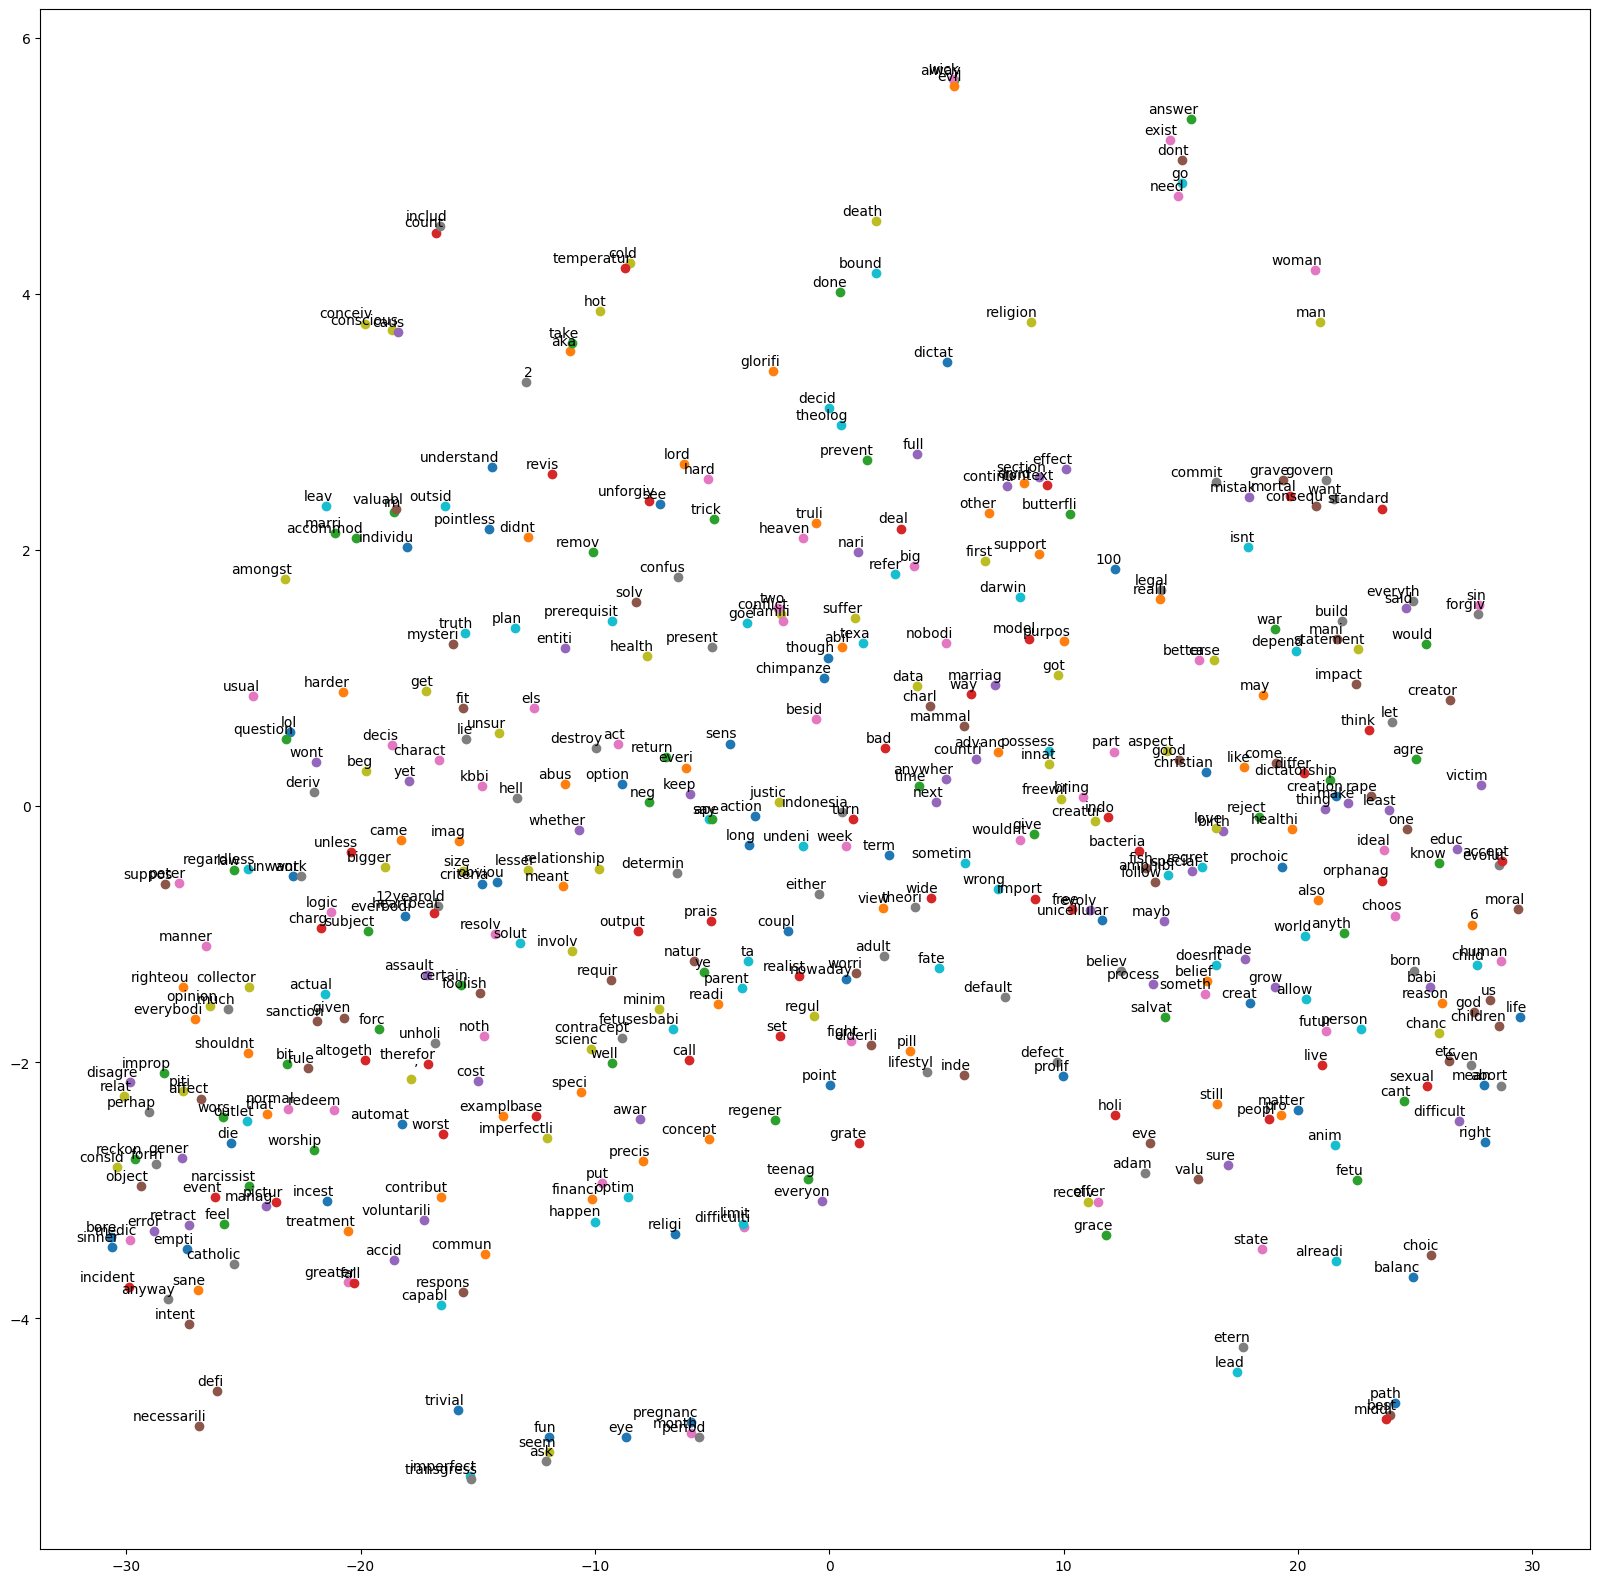

chimpanze has no key in the corpus
alway has no key in the corpus
unwant has no key in the corpus
altogeth has no key in the corpus
someth has no key in the corpus
regul has no key in the corpus
healthi has no key in the corpus
evolut has no key in the corpus
readi has no key in the corpus
marriag has no key in the corpus
noth has no key in the corpus
conceiv has no key in the corpus
100 has no key in the corpus
narcissist has no key in the corpus
entiti has no key in the corpus
everyth has no key in the corpus
manag has no key in the corpus
evolv has no key in the corpus
famili has no key in the corpus
receiv has no key in the corpus
voluntarili has no key in the corpus
contracept has no key in the corpus
speci has no key in the corpus
piti has no key in the corpus
balanc has no key in the corpus
peopl has no key in the corpus
choic has no key in the corpus
imperfectli has no key in the corpus
agre has no key in the corpus
anywher has no key in the corpus
resolv has no key in the corp

KeyError: 'forgiv'

In [28]:
plot_words(w2v, cleanCorpus(w2v, wordList))
plot_words(w2v2, cleanCorpus(w2v2, wordList))

print(cleanCorpus(w2v2, wordList))

In [26]:
# fuck it, try clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import adjusted_mutual_info_score, adjusted_rand_score, normalized_mutual_info_score

def plot_dbscan(lol):
    pass



In [34]:
def sentence_embedding(sentence, w2v_model):
    vecs = [w2v_model[word.lower()] for word in sentence if word in w2v_model.key_to_index]
    norm_vecs = [vec / np.linalg.norm(vec) for vec in vecs if np.linalg.norm(vec) > 0]
    sent_vec = np.mean(vecs, axis=0)
    return sent_vec

[ 0 -1 -1  1 -1 -1 -1 -1  0  2  0  0  0  0  0  0  0  0 -1  0 -1  0  0  0
  0  1 -1  3  0  0  0  2  0  0  0  0  0 -1  0  0  0  2  0  4 -1  0  0  0
  0  3  1  0  0 -1 -1  0  0  0  0  5 -1  4  6  0  6  0 -1  0  7 -1 -1  0
  8  6 -1 -1  0  9  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  9  0  0  0
  0 -1  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0 -1  0 -1
  0  0  0  0  8  0  0  0 -1 -1  0  7  0  0  0 -1  0  0  0 -1 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  9  0  0  0  5  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0

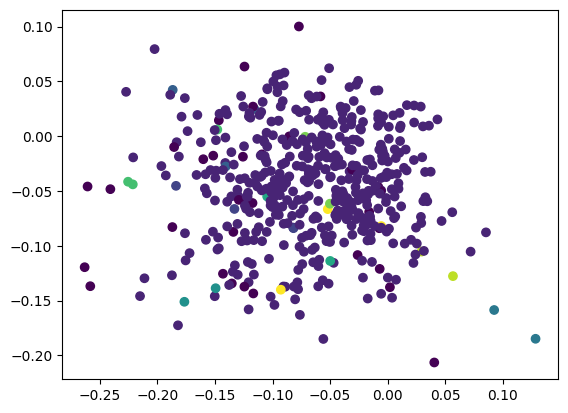

In [27]:
dbscan = DBSCAN(eps=0.3, min_samples=2)

vectors = []
for i in range(len(w2v)):
    vectors.append(w2v[i])
vectors = np.array(vectors)
# print(vectors)
clusters = dbscan.fit_predict(vectors)
print(clusters)

plt.scatter(vectors[:, 0], vectors[:, 1], c=clusters)
plt.show()

I don't know what to make of this.

In [35]:
# let's try that sentence embedding thing now.

sentence_vectors = [sentence_embedding(w2v, sentence) for sentence in answerList]
#print("This for your own : {}".format(sentence_vectors))

sentence_vectors_pretrained = [sentence_embedding(w2v2, sentence) for sentence in answerList]
# print("This is pretrained : {}".format(sentence_vectors_pretrained))

print(len(sentence_vectors))
print(len(sentence_vectors_pretrained))

AttributeError: 'list' object has no attribute 'key_to_index'

Now let's draw it with t-SNE

In [40]:
def plotSentence(vecs):
    
    labels = np.arange(len(vecs))
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(np.array(vecs))

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
    
    plt.figure(figsize=(16, 16))
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()
    pass 

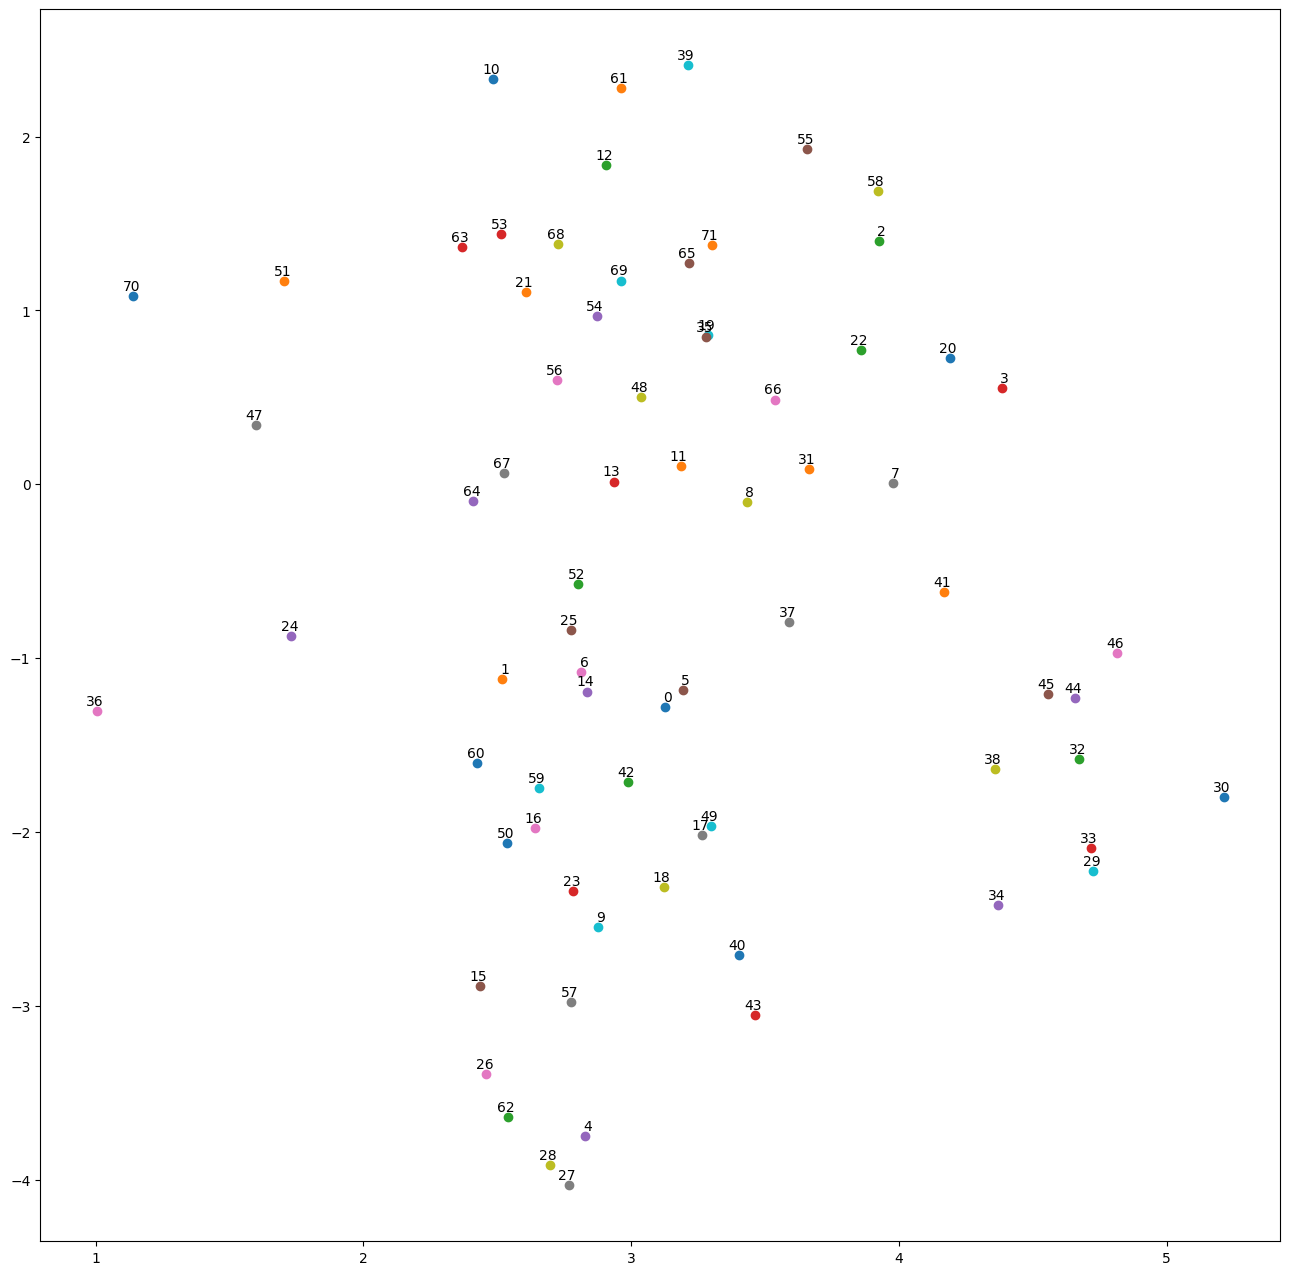

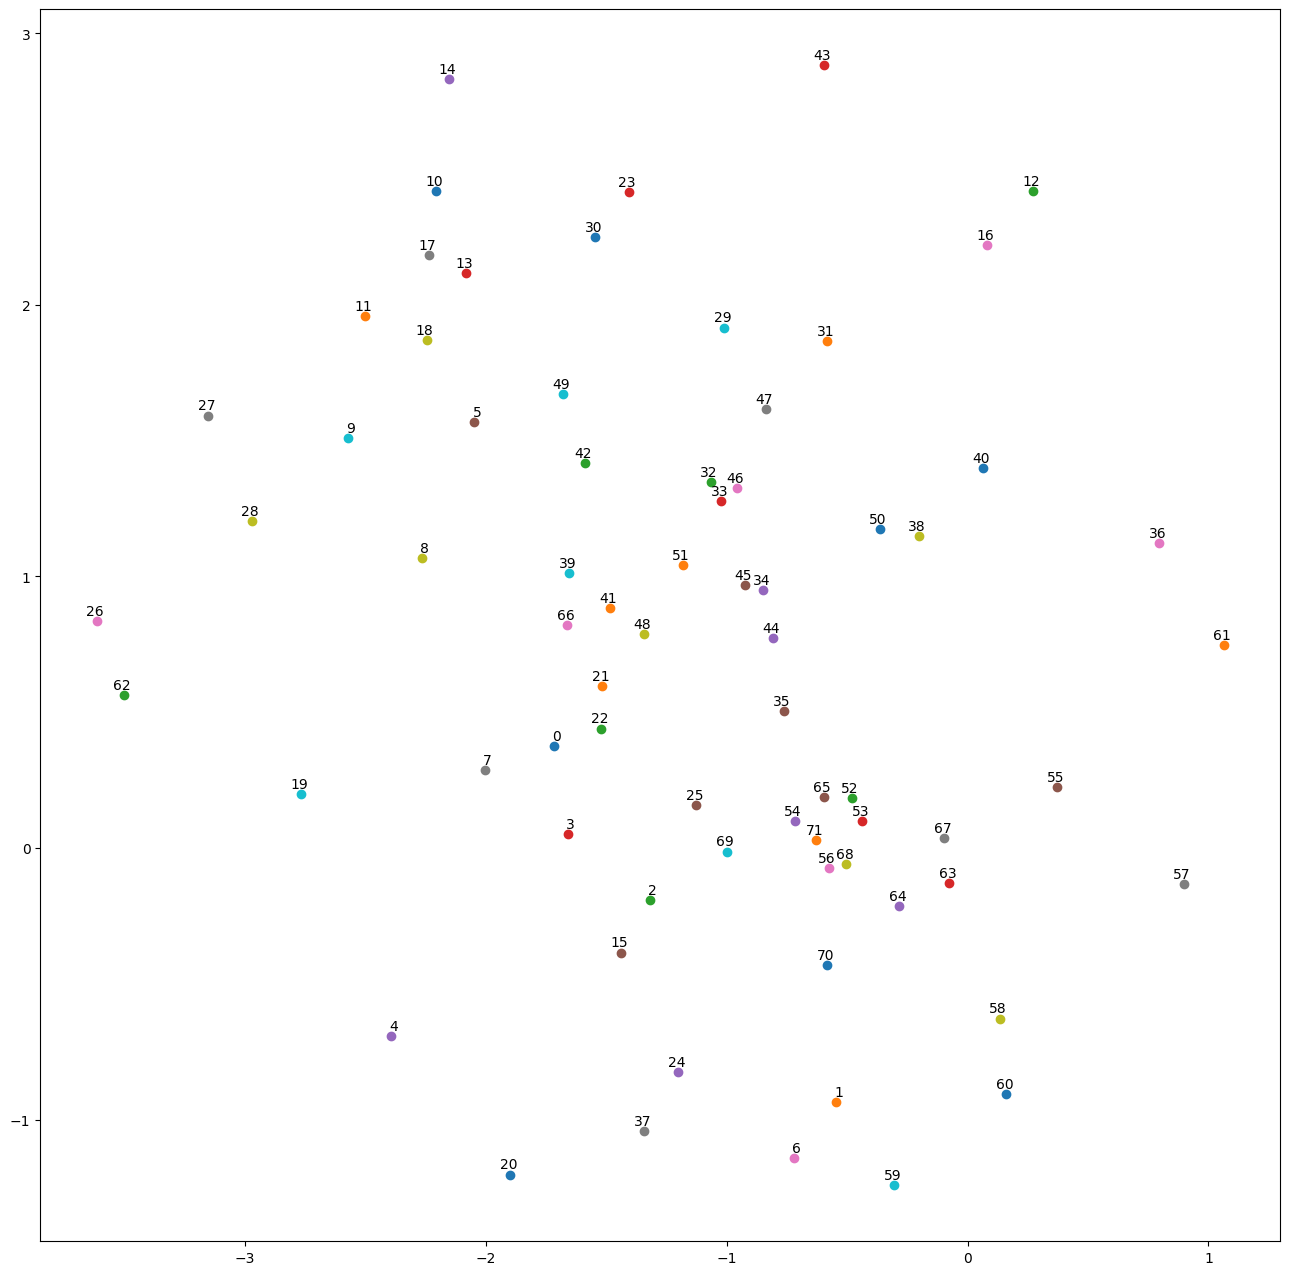

In [42]:
plotSentence(sentence_vectors)
plotSentence(sentence_vectors_pretrained)

<h2>LDA</h2>

In [47]:
# try the LDA
def LDA(document):
    print("looking cool joker!!!!!!!!!!!")
    pass

print(answerList)


0     [everybody, believe, creations, made, creator,...
1     [came, evolution, undeniable, charles, darwins...
2     [dont, really, need, exist, even, dont, exist,...
3     [dont, think, need, exist, peter, said, everyt...
4                        [think, part, bigger, picture]
                            ...                        
67    [everyone, rights, even, fetusesbabies, realis...
68    [wrong, regret, life, right, individual, fetus...
69    [actually, humans, well, aware, life, really, ...
70    [law, didnt, need, revised, choosing, middle, ...
71    [rape, victims, lets, confuse, lets, divide, s...
Name: Answer, Length: 72, dtype: object


In [49]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel

# Step 1: Preprocessing
texts = answerList

# Step 2: Creating a Document-Term Matrix
dictionary = Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

# Step 3: Fitting the LDA model
ldamodel = LdaModel(corpus=corpus, id2word=dictionary, num_topics=2, passes=100)

# Step 4: Inferring topic distribution
topic_distribution = [ldamodel[c] for c in corpus]

# Step 5: Visualizing the topics
print(ldamodel.print_topics())

# Output:
# [(0, '0.250*"soccer" + 0.250*"playing" + 0.250*"love" + 0.250*"I"'),
#  (1, '0.250*"books" + 0.250*"reading" + 0.250*"likes" + 0.250*"She"')]

# Step 6: Evaluating the model
perplexity = ldamodel.log_perplexity(corpus)
print("Perplexity:", perplexity)

[(0, '0.030*"god" + 0.016*"us" + 0.013*"would" + 0.010*"creator" + 0.010*"created" + 0.009*"sins" + 0.009*"know" + 0.008*"person" + 0.008*"think" + 0.007*"live"'), (1, '0.021*"sin" + 0.018*"life" + 0.010*"humans" + 0.010*"know" + 0.010*"human" + 0.009*"prochoice" + 0.009*"fetus" + 0.008*"legal" + 0.007*"etc" + 0.007*"even"')]
Perplexity: -6.365888781870599


In [52]:
# i don't fuckign know let's try something else.
for item in dictionary:
    print(dictionary[item])
# try neural networks to generate an embedding

# try bert to see if it solves our fucking problems

# you haven't even tried LDA.

anything
believe
believing
comes
creations
creator
else
everybody
made
prerequisite
accepted
amphibious
apes
bacteriae
came
charles
creatures
darwins
evolution
evolved
fish
humans
mammals
model
theory
undeniable
unicellular
way
widely
affect
amongst
dont
even
everything
exist
existence
go
gravely
life
many
need
one
really
supposed
world
would
peter
regardless
said
think
usual
bigger
part
picture
community
god
meaning
purpose
put
shouldnt
us
yes
butterfly
effect
general
impact
impacts
negative
statement
supports
term
answer
answers
ask
fun
got
know
lol
question
seemed
thinking
bored
mystery
personally
religion
wont
given
love
nature
needs
outlet
created
glorify
full
mysteries
maybe
relational
empty
reckon
wouldnt
automatically
glorified
indeed
makes
bit
gods
narcissist
reason
thats
create
response
sanction
subject
worship
creation
doesnt
image
long
praise
require
considered
good
things
derived
dictator
entity
value
choice
default
dictatorship
different
involve
matter
outside
pointless
r

In [58]:
import torch
from transformers import *

c:\Users\peter\AppData\Local\Programs\Python\Python38\lib\site-packages\transformers\generation_utils.py:24: FutureWarning: Importing `GenerationMixin` from `src/transformers/generation_utils.py` is deprecated and will be removed in Transformers v5. Import as `from transformers import GenerationMixin` instead.
  warnings.warn(


In [59]:
model = BertModel.from_pretrained('bert-base-uncased')

c:\Users\peter\AppData\Local\Programs\Python\Python38\lib\site-packages\huggingface_hub\file_download.py:129: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\peter\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
loading configuration file config.json from cache at C:\Users\peter/.cache\huggingface\hub\models--bert-base-uncased\sna

In [60]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
text = "This is an example of BERT word embedding."
input_ids = torch.tensor([tokenizer.encode(text)])

OSError: Can't load tokenizer for 'bert-base-uncased'. If you were trying to load it from 'https://huggingface.co/models', make sure you don't have a local directory with the same name. Otherwise, make sure 'bert-base-uncased' is the correct path to a directory containing all relevant files for a BertTokenizer tokenizer.